# Importing Libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import imageio
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from skimage.feature import hog
from skimage.color import rgb2grey
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, auc,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import sys


# Loading CSVs of both Images and Falttened Features Dataset

In [344]:
#Images
#data2 = pd.read_csv("C:/Users/KareemRashwan/Desktop/TESTTT.csv",index_col=0) #10 Images
data2 = pd.read_csv("C:/Users/KareemRashwan/Desktop/Train10.csv",index_col=0) #500 Image

#Flattened CSV
data = pd.read_csv("C:/Users/KareemRashwan/Desktop/train_6000.csv", header=None)

# Get Image from data2
def get_image(row_id, root="C:/Users/KareemRashwan/Desktop/train_min-20200102T081544Z-001/train_min/"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}.tif".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)
    

Run when using Images Data

In [345]:
data2

,labels
id,
eca027e439de9ddd9500af73e092c26a27e1821d,1
f6366f772c75702e696325d0c9054922c3120987,0
d46b4e68b13014f730dc36123c27f1409965f971,1
fbf27cd471864ec069365a2319da09fee9dfafe6,0
dc7020bfdf90b844ed790bfe5121b4d63d640038,1
...,...
eb04d6ebf73e686ecc7d5978d5a70e69ac40e37d,0
e69107dae64349d24f5fec9b6dc49cc02772d867,0
e7db48b868488f7c9bb09beced78f412e0b707c3,0


In [346]:
data2.head()

,labels
id,
eca027e439de9ddd9500af73e092c26a27e1821d,1
f6366f772c75702e696325d0c9054922c3120987,0
d46b4e68b13014f730dc36123c27f1409965f971,1
fbf27cd471864ec069365a2319da09fee9dfafe6,0
dc7020bfdf90b844ed790bfe5121b4d63d640038,1


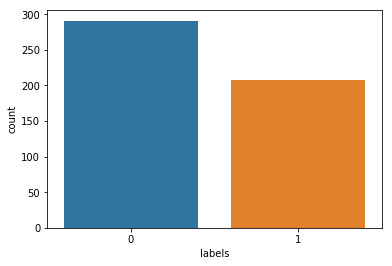

In [347]:
sns.countplot(x='labels',data=data2)

Run when using Features CSV Only

In [ ]:
data

In [ ]:
# Rename last column from 3072 to labels
data.rename(columns = {3072:'labels'}, inplace = True) 


In [ ]:
features = data.loc[:, data.columns != 'labels']

In [ ]:
labels = data['labels']

In [ ]:
labels.head()

In [ ]:
features.head()

In [ ]:
sns.countplot(x='labels',data=data)

# Trial load to when using Images Data

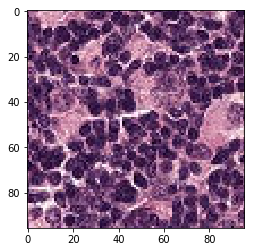

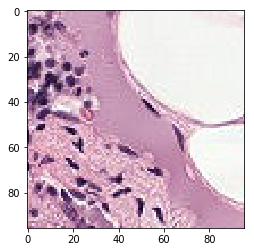

In [348]:
#Get the first image that has label 1 (Benign)
Benign = data2[data2.labels == 1.0].index[0]
# show the corresponding image
plt.imshow(get_image(Benign))
plt.show()



#Get the first image that has label 0 (Malignant)
Malignant = data2[data2.labels == 0.0].index[0]
# show the corresponding image
plt.imshow(get_image(Malignant))
plt.show()

Colored Malignant image has shape:  [[[198 163 183]
  [216 183 200]
  [241 211 223]
  ...
  [253 252 250]
  [249 248 246]
  [243 242 240]]

 [[198 160 183]
  [211 173 194]
  [231 197 214]
  ...
  [250 246 245]
  [252 248 247]
  [249 245 244]]

 [[210 167 195]
  [190 150 177]
  [204 164 191]
  ...
  [242 232 233]
  [240 230 231]
  [234 224 225]]

 ...

 [[197 149 165]
  [176 129 149]
  [153 105 127]
  ...
  [206 160 188]
  [205 159 187]
  [204 158 186]]

 [[209 153 178]
  [206 150 177]
  [255 222 254]
  ...
  [210 164 193]
  [208 162 191]
  [206 160 189]]

 [[181 120 153]
  [164 103 137]
  [183 121 160]
  ...
  [206 157 187]
  [203 157 186]
  [202 156 185]]]


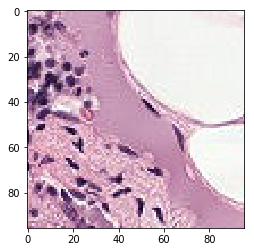

In [349]:
# Shape of malignant Image
MalignantColor = get_image(Malignant)
plt.imshow(MalignantColor, cmap=plt.cm.gray)
print('Colored Malignant image has shape: ', MalignantColor)

Grayscale Malignant image has shape:  [[0.67403725 0.74995373 0.85584392 ... 0.98850314 0.97281686 0.94928745]
 [0.66562078 0.71603569 0.80568902 ... 0.96775647 0.97559961 0.9638349 ]
 [0.69865216 0.62920275 0.68410471 ... 0.91842    0.91057686 0.88704745]
 ...
 [0.62883765 0.55070392 0.4579851  ... 0.67370118 0.66977961 0.66585804]
 [0.65373529 0.64253608 0.90713608 ... 0.6896702  0.68182706 0.67398392]
 [0.53075216 0.46436824 0.53720353 ... 0.66500196 0.66221922 0.65829765]]


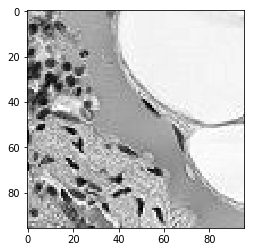

In [350]:
# convert the Malignant image to grayscale
MalignantGray = rgb2grey(MalignantColor)
plt.imshow(MalignantGray, cmap=plt.cm.gray)
print('Grayscale Malignant image has shape: ', MalignantGray)

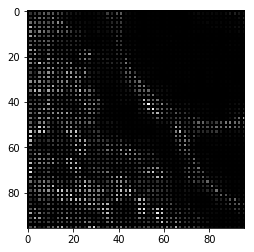

In [351]:
# create Histogram of Oriented Gradients using greyscale Malignant image creating 2 pixels per cell
hog_features, hog_image = hog(MalignantGray,
                              visualise=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(2, 2))

plt.imshow(hog_image, cmap=plt.cm.gray)


# Creating Methods to extract features when using Images Data

In [352]:
# Create Features of an Image
def create_features(img):
    # flatten colored images
    color_features = img.flatten()
    # convert image to greyscale
    gray_image = rgb2grey(img)
    # HOG features from greyscale image
    hog_features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(1, 1))
    # combine color and hog feature
    flat_features = np.hstack(color_features)
    return flat_features

#Malignant_features = create_features(MalignantColor)
#print(Malignant_features)


In [353]:
#Create Feature Matrix for all images
def create_feature_matrix(label_dataframe):
    features_list = []
    for i in tqdm(label_dataframe.index):
            # load image
            i = get_image(i)
            # get features for image
            image_features = create_features(i)
            features_list.append(image_features)
        
    # convert list of arrays into a matrix
    # rows are images and columns are features.
    feature_matrix = np.array(features_list)
    return feature_matrix


In [354]:
# create_feature_matrix on images
print("Creating Features Started!!")
feature_matrix = create_feature_matrix(data2)
print('Feature matrix shape is: ', feature_matrix.shape)

Creating Features Started!!


HBox(children=(IntProgress(value=0, max=499), HTML(value='')))


Feature matrix shape is:  (499, 27648)


In [355]:
#Saving in other varible as backup
feature_matrix2 = feature_matrix

# Standerdize extracted Features and Run PCA to detrmine number of components

Run when using Images Data

In [356]:
print('Data matrix shape is: ', feature_matrix.shape)

Data matrix shape is:  (499, 27648)


In [357]:
# Run when using Images Data
# standard scaler to bring feature to same level of magintude
SC = StandardScaler()
# scale the feature matrix
scaled_feature_matrix = SC.fit_transform(feature_matrix)
print('Feature matrix shape is: ', scaled_feature_matrix.shape)

C:\Users\KareemRashwan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Feature matrix shape is:  (499, 27648)


Run when using Features CSV Only

In [ ]:
print('Feature matrix shape is: ', features.shape)

In [ ]:
# standard scaler to bring feature to same level of magintude on Features CSV
SC = StandardScaler()
# scale the feature matrix
scaled_feature_matrix = SC.fit_transform(features)
print('Feature matrix shape is: ', scaled_feature_matrix.shape)

Run on Both 

In [358]:
# run PCA on  standardized matrix
pca = PCA(n_components=2)
pcasfm = pca.fit_transform(scaled_feature_matrix)
print('PCA Scaled Featured Matrix shape is: ', pcasfm.shape)

PCA Scaled Featured Matrix shape is:  (499, 2)


In [359]:
print(pcasfm)

[[ 1.50828945e+02 -1.80130358e+01]
 [-7.50694797e+01 -1.43822126e+01]
 [-3.93517249e+01 -3.37347027e+00]
 [-1.65269939e+02 -1.70644944e-01]
 [ 1.07111040e+00 -1.88815225e+01]
 [ 5.52194749e+01 -2.55242871e+01]
 [-1.47716472e+02  3.26634860e+00]
 [ 6.63336206e+01 -1.87220029e+01]
 [ 2.05932429e+02 -2.28205975e+01]
 [ 1.09027091e+01  3.35030227e+01]
 [-3.58027707e+01  3.19714366e+01]
 [ 1.29330145e+02 -1.90226669e+01]
 [-3.42609471e+00  2.65571404e+01]
 [-1.68387615e+02 -1.39139660e+00]
 [ 1.60694674e+02  4.68296669e+01]
 [-2.08947696e+02  1.99624408e+00]
 [-1.91821166e+02 -2.80970217e+00]
 [-4.48745957e+01  4.47752570e+00]
 [ 4.19784384e+01  2.78404798e+01]
 [-1.72196416e+02 -3.01749211e-01]
 [ 1.04690867e+02 -3.14612558e+01]
 [ 1.35393945e+02  4.84366868e+01]
 [-1.02337887e+02 -2.38206258e+01]
 [-1.92877534e+00  2.32008538e+01]
 [ 1.26020663e+02 -1.66674169e+01]
 [ 1.04146628e+02  5.23750093e+01]
 [ 7.69995631e+01 -3.50406512e+01]
 [ 2.16018141e+01 -1.97406031e+01]
 [ 8.10959156e+01 -2

 [ 3.69760823e+01 -1.53408964e+01]]


# Splitting Data

Run when using Images Data

In [360]:
#Splitting from Images data
X = pd.DataFrame(pcasfm) #Features
y = pd.Series(data2.labels) #Labels
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=123321)

# distrubution of labels in the train set
pd.Series(y_train).value_counts()

0    202
1    147
Name: labels, dtype: int64

Run when using Features CSV Only

In [ ]:
#Splitting from csv data
X = pd.DataFrame(pcasfm) #Features
y = pd.Series(data.labels) #Labels
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=123321)

# distrubution of labels in the train set
pd.Series(y_train).value_counts()


# Code Below uses same naming convention for BOTH datasets

In [417]:
#Converting everything to numppyy array
NPTRAINX = np.array(X_train)
NPTRAINY = np.array(y_train)
NPTestX = np.array(X_test)
NPTestY = np.array(y_test)
NPX = np.array(X)
NPY = np.array(y)


In [418]:
NPTRAINX.shape

(349, 2)

In [419]:
NPTRAINY.shape

(349,)

In [420]:
NPTestX.shape

(150, 2)

In [421]:
NPTestY.shape

(150,)

In [422]:
NPX.shape

(499, 2)

In [423]:
NPY.shape

(499,)

# SVM Model

In [424]:
def train_svm(NPTRAINX, NPTRAINY, epochs=200):
    #Initialize SVM weight zeros 
    w = np.zeros(len(NPTRAINX[0]))

    # The learning rate Alpha
    learning_rate = 0.1
    
    w0_per_epoch = []
    w1_per_epoch = []
    
    # Training Phase
    print("Training Started!!")
    for epoch in tqdm(range(1, epochs)):
        error = 0
        for i, x in enumerate(NPTRAINX):
            if (NPTRAINY[i] * np.dot(NPTRAINX[i], w)) < 1:
                w = w + learning_rate * ((NPTRAINY[i] * NPTRAINX[i]) - (2 * (1/epochs) * w))
            else:
                w = w + learning_rate * (-2 * (1/epochs) * w)
                
        w0_per_epoch.append(w[0])
        w1_per_epoch.append(w[1])
    
    return w, w0_per_epoch, w1_per_epoch

In [425]:
w, w0array, w1array = train_svm(NPTRAINX, NPTRAINY, epochs=200)
print(w)

Training Started!!


HBox(children=(IntProgress(value=0, max=199), HTML(value='')))


[10.93183062 -2.86549493]


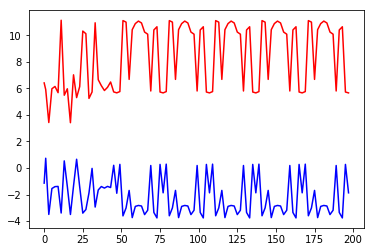

In [426]:
epochs = len(w0array)

weights_to_graph = 100

num_per_epoch = epochs/weights_to_graph

w0_to_graph = []
w1_to_graph = []
epoch_to_graph = []

for i in range(weights_to_graph):
    epoch_to_graph.append(int(num_per_epoch*i))
    w0_to_graph.append(w0array[int(num_per_epoch*i)])
    w1_to_graph.append(w1array[int(num_per_epoch*i)])
    
plt.plot(epoch_to_graph, w0_to_graph, 'r',epoch_to_graph, w1_to_graph,'b')

# Scatter Plot

HBox(children=(IntProgress(value=0, max=150), HTML(value='')))

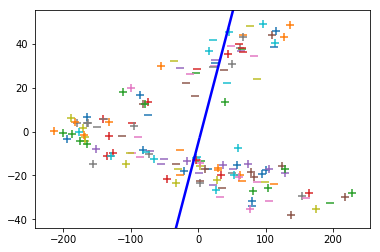

In [427]:
# for each point if Label is '1' then '_'  and if '0' then '+' 
for i in tqdm(range(len(NPTestX))):
    if NPTestY[i] == 1:
        plt.scatter(NPTestX[i][0], NPTestX[i][1], s=50, marker='_', linewidths=2)
    else:
        plt.scatter(NPTestX[i][0], NPTestX[i][1], s=50, marker='+', linewidths=2)
        
# Print the hyperplane
x2=[w[0]*0.2,w[1],-w[1],w[0]]
x3=[w[0]*0.2,w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
NPTestX,NPTestY,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(NPTestX,NPTestY,U,V,scale=4, color='blue')

# Done